### Workshop 6 - Use R to perform differential gene expression (DGE) analysis
  
1. Activate a [conda](https://www.anaconda.com/products/distribution) environment called `bioinfo` that has all the tools we need for the analysis (and much more)  
**Before running these commands make sure that the Kernel is changed to Bash or Bash Calysto!**

In [1]:
conda config --set changeps1 False
source /opt/tljh/user/bin/activate bioinfo

2. Load the required R libraries/packages  
**Before running the commands below make sure that the Kernel is changed to R!**

In [1]:
library("DESeq2")
library("ggplot2")
library("EnhancedVolcano")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: M

3. Read the data files (containing read counts and sample metadata table)  

In [ ]:
directory <- "./HTSEQ/STAR37/"

sampleFiles <- list.files(directory)
sampleCondition <- sub("_\\d.tab","",sampleFiles)
samples <- data.frame(sampleName = sampleFiles,
                           run = sampleFiles,
                           condition = sampleCondition)
run <- as.vector(samples$run)
head(samples)

write.csv(as.data.frame(samples),
          file="output/Experimental_design.csv")


4. Process the data to normalise the read counts and perform PCA

In [ ]:
ddsHTSeq <- DESeqDataSetFromHTSeqCount(sampleTable = samples,
                                       directory = directory,
                                       design= ~ condition)
ddsHTSeq


keep <- rowSums(counts(ddsHTSeq)) >= 10
ddsHTSeq <- ddsHTSeq[keep,]

raw_counts <- data.frame(counts(ddsHTSeq))
write.csv(as.data.frame(raw_counts),
          file="output/Rawcounts.csv", col.names = TRUE)

vsd <- vst(ddsHTSeq, blind=FALSE)
head(assay(vsd), 3)

plotPCA(vsd, intgroup=c("condition")) + geom_text(aes(label=name), vjust=2)
ggsave("output/PCA.pdf", width=8, height=5)

write.csv(as.data.frame(assay(vsd)),
          file="output/Normalized_counts.csv")

5. Perform the DGE analysis and create a volcano plot 

,sampleName,run,condition
,<chr>,<chr>,<chr>
1,Control_1.tab,Control_1.tab,Control
2,Control_2.tab,Control_2.tab,Control
3,Control_3.tab,Control_3.tab,Control
4,Disease_1.tab,Disease_1.tab,Disease
5,Disease_2.tab,Disease_2.tab,Disease
6,Disease_3.tab,Disease_3.tab,Disease


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 59408 6 
metadata(1): version
assays(1): counts
rownames(59408): 5S_rRNA 7SK ... snosnR60_Z15 snosnR66
rowData names(0):
colnames(6): Control_1.tab Control_2.tab ... Disease_2.tab
  Disease_3.tab
colData names(1): condition

Warning message in write.csv(as.data.frame(raw_counts), file = "output/Rawcounts.csv", :
“attempt to set 'col.names' ignored”


,Control_1.tab,Control_2.tab,Control_3.tab,Disease_1.tab,Disease_2.tab,Disease_3.tab
A1BG,6.592303,6.754590,6.705908,6.571046,6.868714,7.105842
A1BG-AS1,9.674897,9.184818,9.313276,8.802445,9.038338,9.020997
A2M,6.037353,6.053680,10.708043,7.397924,9.897314,10.391903


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): condition Disease vs Control 
Wald test p-value: condition Disease vs Control 
DataFrame with 22066 rows and 6 columns
          baseMean log2FoldChange     lfcSE      stat     pvalue      padj
         <numeric>      <numeric> <numeric> <numeric>  <numeric> <numeric>
A1BG      31.08191       0.516713  0.547044  0.944554 0.34488643 0.5576425
A1BG-AS1 489.16909      -0.536773  0.250697 -2.141123 0.03226410 0.1047357
A2M      625.57516       0.464436  2.179240  0.213118 0.83123483 0.9167293
A2M-AS1    6.04877       0.539443  1.112070  0.485080 0.62761953 0.7958167
A4GALT   566.50216       1.938595  0.752101  2.577572 0.00994972 0.0425497
...            ...            ...       ...       ...        ...       ...
snoU109   13.63355      -0.882719  0.674623 -1.308463  0.1907163  0.375817
snoU13   213.02777      -0.166911  0.534808 -0.312096  0.7549675  0.876552
snoU2-30   4.41180      -0.132943  1.231349 -0.107966  0.9140229  0.958204
snoU2_19  13.09476       0.14813

log2 fold change (MLE): condition Disease vs Control 
Wald test p-value: condition Disease vs Control 
DataFrame with 22066 rows and 6 columns
           baseMean log2FoldChange     lfcSE      stat      pvalue        padj
          <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
ADGRD1     1912.872       10.21382  0.561045   18.2050 4.71176e-74 9.55498e-70
MASP1      3143.721       10.64446  0.593187   17.9445 5.29785e-72 5.37175e-68
DHRS3      3151.763        6.87766  0.463698   14.8322 9.07196e-50 6.13234e-46
LRRN4CL     629.379        6.95450  0.470946   14.7671 2.38859e-49 1.21095e-45
AKAP12    20777.260        2.54685  0.177602   14.3402 1.22615e-46 4.97300e-43
...             ...            ...       ...       ...         ...         ...
TLL1       151.6254      -5.173265   2.64899 -1.952917          NA          NA
TRHDE      799.7449       0.747750   1.94425  0.384595          NA          NA
TRHDE-AS1  202.4892       0.721774   2.29215  0.314890          NA 

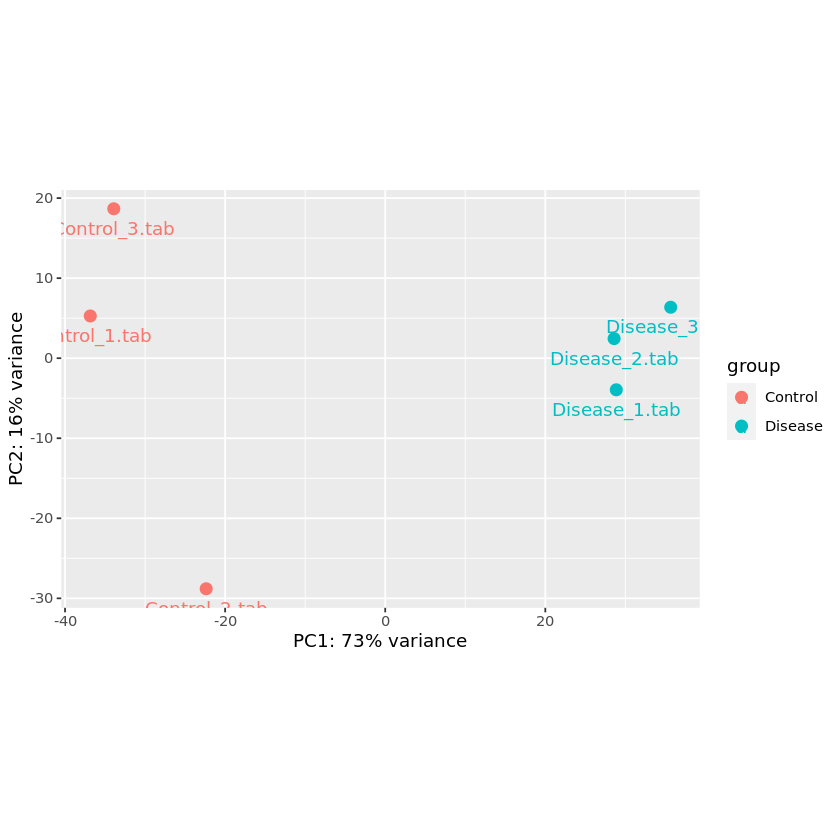

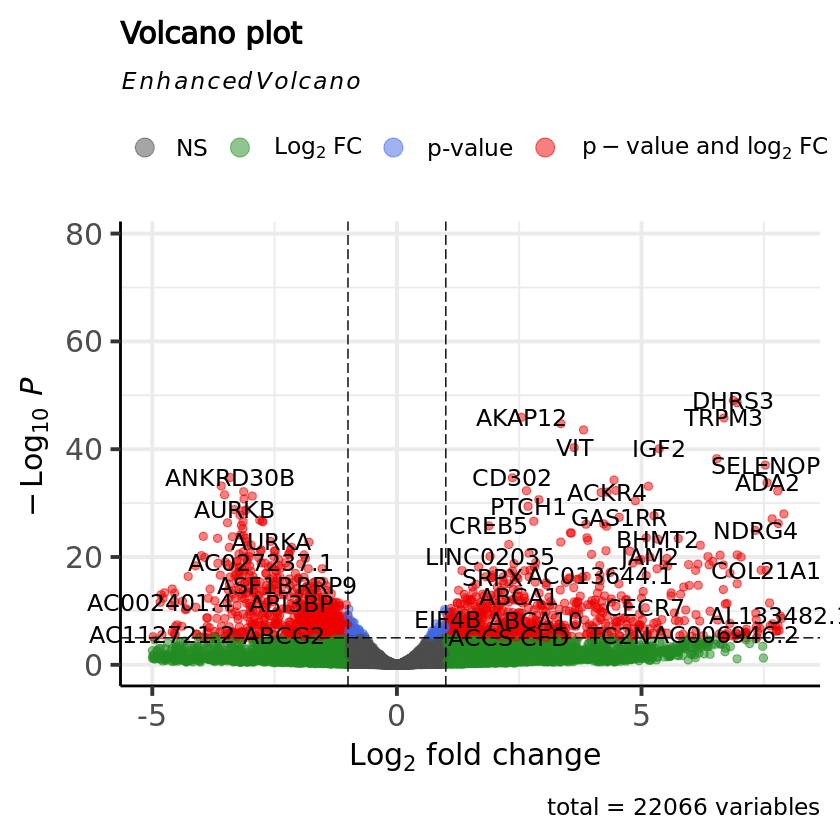

In [2]:



ddsHTSeq$condition <- relevel(ddsHTSeq$condition, ref = "Control")

ddsHTSeq <- DESeq(ddsHTSeq)
res <- results(ddsHTSeq)
res
resOrdered <- res[order(res$pvalue),]
resOrdered

write.csv(as.data.frame(resOrdered),
          file="output/DEG_Results.csv")


EnhancedVolcano(res,
                lab = rownames(res),
                x = 'log2FoldChange',
                y = 'pvalue',
                xlim = c(-5, 8))